# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [171]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [172]:
#TEST URL C/ FORMATTING - SPECIFIC EXAMPLE
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="
city_url = "london"

response = requests.get(url + city_url).json()
pprint(response)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1689050062,
 'id': 2643743,
 'main': {'feels_like': 18.15,
          'humidity': 88,
          'pressure': 1010,
          'temp': 18,
          'temp_max': 19.45,
          'temp_min': 16.12},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2075535,
         'sunrise': 1689047750,
         'sunset': 1689106538,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 230, 'speed': 5.66}}


In [173]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = cities[i]
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | kudymkar
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 6 of Set 1 | chonchi
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | tromso
Processing Record 10 of Set 1 | vadso
Processing Record 11 of Set 1 | solnechnyy
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | shiguai
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | utrik
Processing Record 16 of Set 1 | znamenskoye
Processing Record 17 of Set 1 | erenhot
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | carnarvon
Processing Record 22 of Set 1 | newman
Proc

In [174]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [175]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,21.17,82,0,2.57,US,1689050325
1,kudymkar,59.0173,54.6560,15.26,93,100,4.63,RU,1689050560
2,adamstown,-25.0660,-130.1015,21.50,61,100,4.47,PN,1689050326
3,puerto natales,-51.7236,-72.4875,-0.63,86,100,1.17,CL,1689050324
4,chonchi,-42.6128,-73.8092,1.73,96,13,0.84,CL,1689050561


In [176]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [177]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,21.17,82,0,2.57,US,1689050325
1,kudymkar,59.0173,54.6560,15.26,93,100,4.63,RU,1689050560
2,adamstown,-25.0660,-130.1015,21.50,61,100,4.47,PN,1689050326
3,puerto natales,-51.7236,-72.4875,-0.63,86,100,1.17,CL,1689050324
4,chonchi,-42.6128,-73.8092,1.73,96,13,0.84,CL,1689050561


In [178]:
#CONVERTING DATE TO READABLE DATE
time_test = city_data_df["Date"]
time_list = []
for value in time_test:
    #REFERENCED STACKOVERFLOW #3682748
    new = datetime.utcfromtimestamp(value).strftime('%Y-%m-%d %H:%M:%S')
    time_list.append(new)
    
readable_date = time_list[0].split(" ")
pretty_date = readable_date[0]
pretty_date

'2023-07-11'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

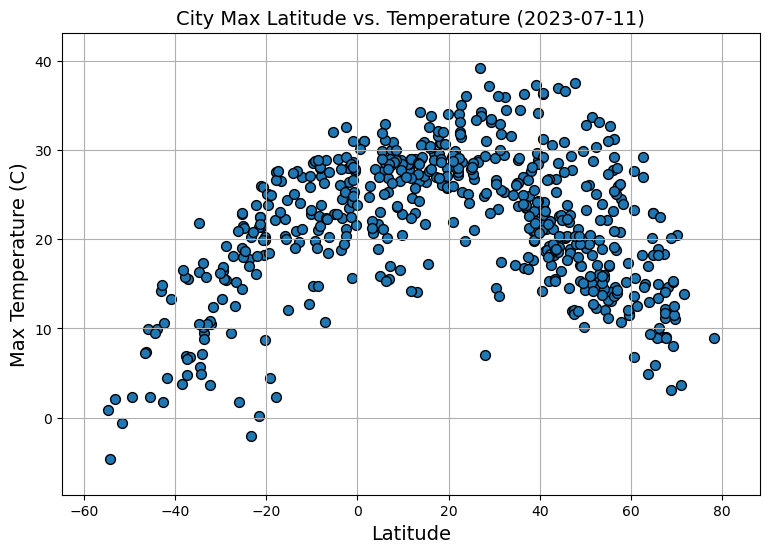

In [187]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.title(f"City Max Latitude vs. Temperature ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Max Temperature (C)", fontsize=14)
plt.xlim((min(x_values)-10),(max(x_values)+10))
plt.ylim((min(y_values)-4),(max(y_values)+4))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

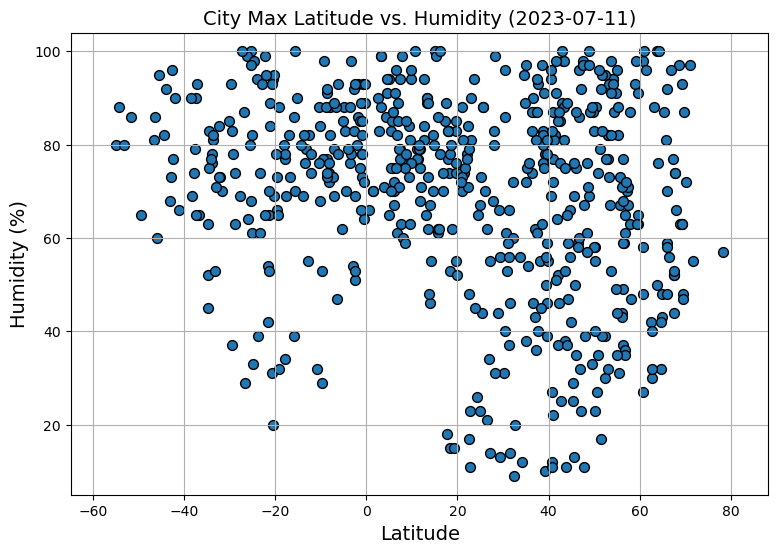

In [186]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.title(f"City Max Latitude vs. Humidity ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=14)
plt.xlim((min(x_values)-10),(max(x_values)+10))
plt.ylim((min(y_values)-4),(max(y_values)+4))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

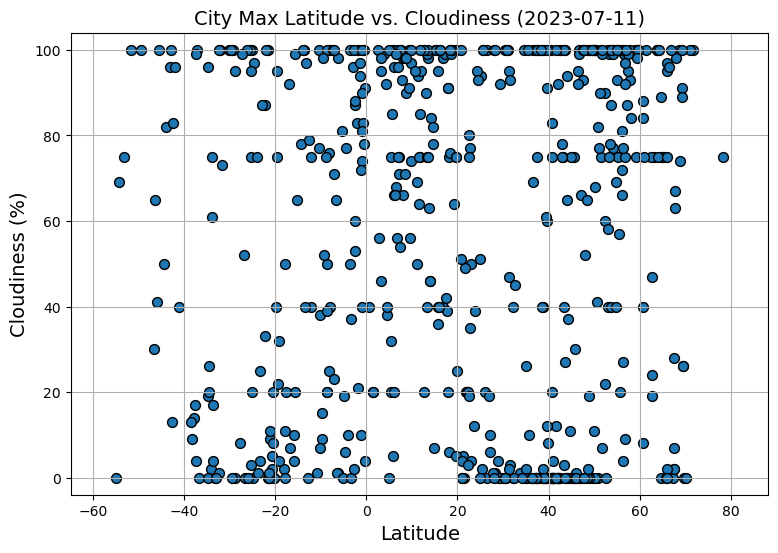

In [188]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.title(f"City Max Latitude vs. Cloudiness ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=14)
plt.xlim((min(x_values)-10),(max(x_values)+10))
plt.ylim((min(y_values)-4),(max(y_values)+4))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

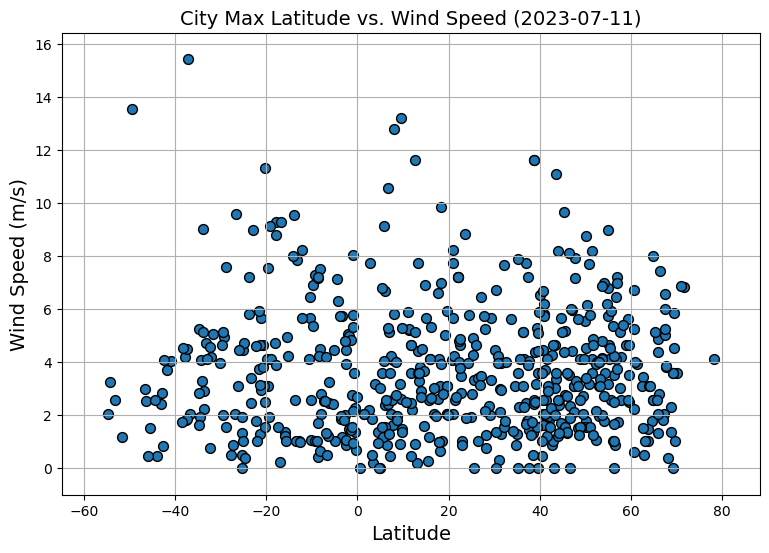

In [191]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.figure(figsize=(9,6))
plt.scatter(x_values, y_values, edgecolors="black", s=50)
plt.title(f"City Max Latitude vs. Wind Speed ({pretty_date})", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.ylabel("Wind Speed (m/s)", fontsize=14)
plt.xlim((min(x_values)-10),(max(x_values)+10))
plt.ylim((min(y_values)-1),(max(y_values)+1))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE